---

# Analyse des données du sondage Stack Overflow 2019

---

# Compréhension du sondage

Avec près de 90 000 réponses provenant de plus de 170 pays et territoires dépendants, le sondage <b> Stack Overflow Annual Developer Survey </b> continue d'être le sondage le plus complet jamais réalisée auprès des développeurs de logiciels. Le sondage couvre des aspects tels que la satisfaction professionnelle et la recherche d'emploi dans les langages de programmation...etc

Dans ce projet, les résultats du sondage seront utilisés pour répondre aux questions suivantes pour les aspirants scientifiques des données (data scientists):

* Quel est le langage de programmation de votre choix?
* Quel est le salaire des développeurs?
* Quel est le framework de choix numéro un pour les développeurs?


---

### Resumé des résultats

Après avoir analysé les données, nous constatons que python est le langage de programmation de choix pour les développeurs qui s'identifient en tant que **Data Scientist** et **Machine Learning Specialist**. Les salaires des **Data Scientists et Machine Learning Specialist** sont les plus élevés des États-Unis. Étonnamment, jQuery est le framework web de choix.

Pour plus de détails, référons nous à l'analyse complète ci-dessous.

---

In [1]:
# Chargement des librairies requis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

---

# Compréhension des données

---


In [2]:
df = pd.read_csv("../model_dev/data/survey_results_public_2019.csv", low_memory = False)
schema = pd.read_csv("../model_dev/data/survey_results_schema.csv")
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
df.shape

(88883, 85)

In [4]:
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


In [5]:
schema.shape

(85, 2)

Les données du sondage comprennent 88 883 enregistrements et 85 colonnes.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [7]:
# Vérification des colonnes sans valeurs manquantes
set(df.isna().sum()[df.isna().sum()==0].keys())

{'Hobbyist', 'OpenSourcer', 'Respondent'}

In [8]:
# Vérification des colonnes manquant plus de 50% de valeurs
set(df.columns[100*df.isna().sum()/df.shape[0] > 50])

set()

In [9]:
# Vérification de shema manquants
schema.isnull().sum()

Column          0
QuestionText    0
dtype: int64

## 1. Quel est le language de programmation de votre choix?

Il y a tellement, tellement de langages de programmation. Jetons donc un coup d'œil à ce que différents développeurs du monde entier utilisent. Cela devrait nous donner une idée de quels laguagues sont importants pour quels domaines. 

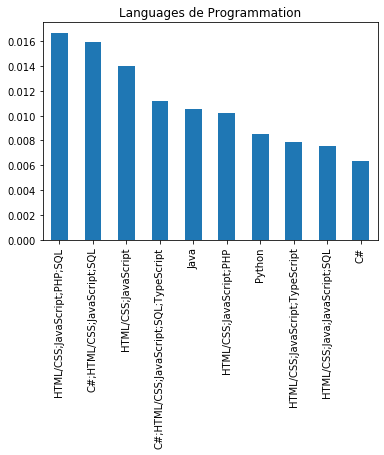

In [10]:
count_values = df.LanguageWorkedWith.value_counts() #Pandas series pour chaque LanguageWorkedWith

# Affichage des 10 premiers

(count_values[:10]/df.shape[0]).plot(kind="bar");
plt.title("Languages de Programmation");

In [11]:
# le format des langages de programmation doit être nettoyé, car les développeurs utilisant plusieurs langages,
# ces langues sont concaténées avec;

In [12]:
# Nous divisons LanguageWorkedWith pour avoir une bonne perception
languages = df[df['LanguageWorkedWith'].notnull()]

unique_languages = {}

# division des languages au ;
for language_set in languages['LanguageWorkedWith'].apply(lambda row: str(row).split(';')):
    for language in language_set:
        if language not in unique_languages.keys():
            unique_languages[language] = 1
        else:
            unique_languages[language] += 1

In [13]:
# Fonction qui sera utilisée pour l'affichage d'un graphe à barre horizontale
def plot_dimension_count(unique_dim_dict, plot_title):
    """ Fonction de traçage d'un graphique à barres horizontales pour le dictionnaire de dimension donné
    
    INPUT - unique_dim_dict - dictionnaire
            plot_title - string - plot_title
    
    OUTPUT - graphique à barres montrant le nombre total par dimension d'intérêt
            
    """
    dim_count = pd.DataFrame.from_dict(unique_dim_dict, orient='index', dtype=None)
    dim_count.columns = ['Count']
    dim_count.sort_values('Count',ascending=True,inplace=True)

    dim_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = plot_title);

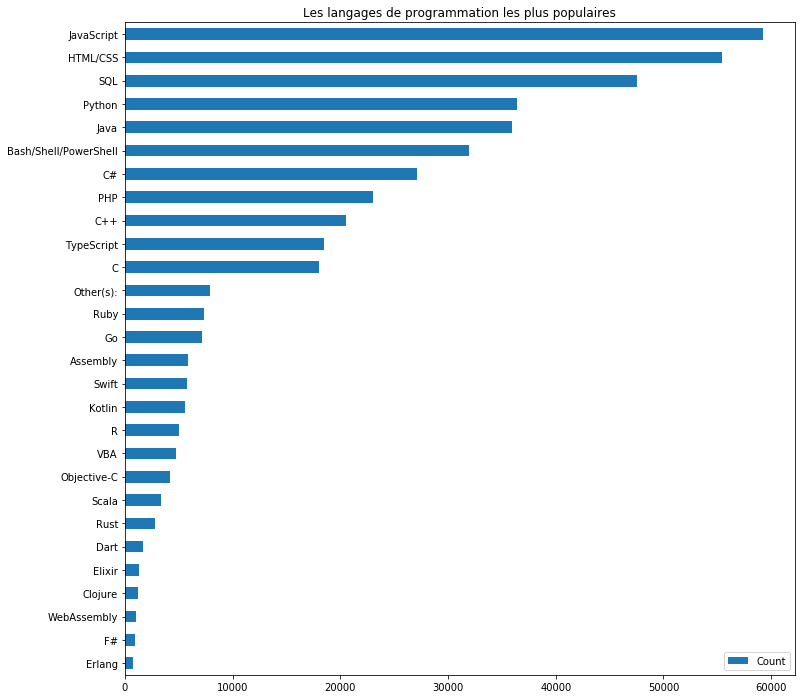

In [14]:
# Graphes à barres
plot_dimension_count(unique_languages,'Les langages de programmation les plus populaires')

---

Bien qu'il soit satisfaisant de connaître les langages les plus populaires, cela ne permet pas à lui seul de connaître la langue la plus populaire pour les Data Scientists. Donc, nous allons prendre une approche différente.

---

In [15]:
# Nous divisons LanguageWorkedWith pour avoir une grande perception

# Les developpeurs uniques
developers = df[df['DevType'].notnull()] # suppression des valeurs nulles
unique_developers = {}

# division des languages au ;
for developer_set in developers['DevType'].apply(lambda row: str(row).split(';')):
    for developer in developer_set:
        if developer not in unique_developers.keys():
            unique_developers[developer] = 1
        else:
            unique_developers[developer] += 1

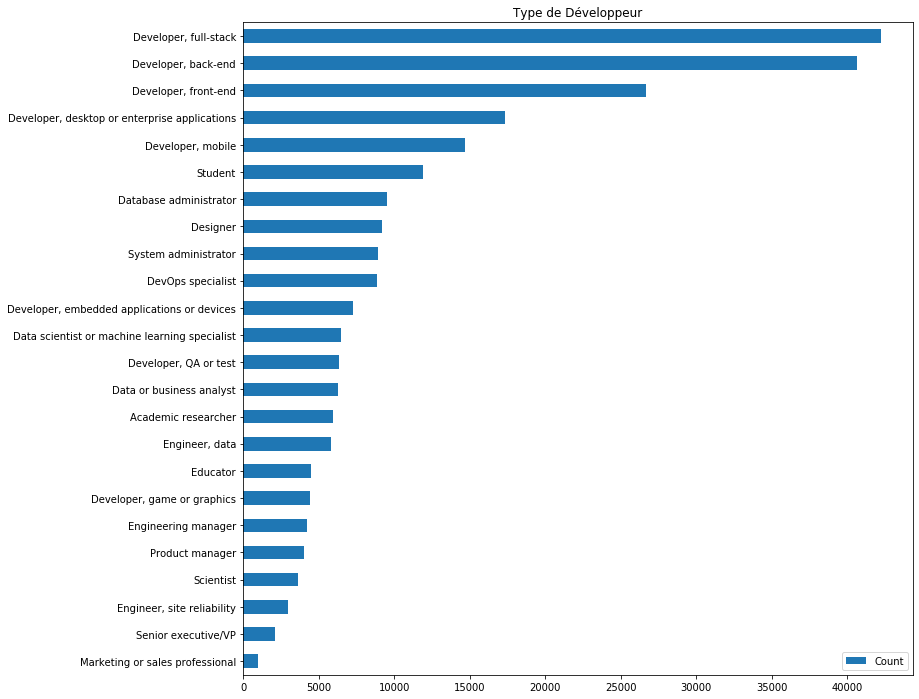

In [16]:
# Graphe des types de developpeurs
plot_dimension_count(unique_developers,'Type de Développeur')

Étant donné que nous sommes intéressés par le langage de choix de Data Scientists, nous nous concentrerons sur le `'Data scientist ou spécialiste en Machine Learning Specialist'`

In [17]:
# nombre de language de programmation par Data scientist or machine learning specialist' developpeur
languages = languages[languages['DevType'].notnull()]

# DataFrame à partir de notre dictionnaire par index
developer_count = pd.DataFrame.from_dict(unique_developers, orient='index', dtype=None)

# Dictionnaire vide de developeur
developer_dict = {}
for devtype in developer_count.index.tolist():
    developer_dict['{}'.format(devtype)] = {}

# remplissement du dictionnaire
for dev in developer_dict.keys():
    developer_dict[dev] = {key: 0 for key in list(unique_languages.keys())}
    
# Nombre de developpeurs utilisant le langage
for key, val in enumerate(languages['DevType']):
    all_developers = val.split(';')
    all_languages = languages.iloc[key, 43].split(';')
    for dev in all_developers:
        for lang in all_languages:
            developer_dict[dev][lang] += 1

developer_language_count = pd.DataFrame.from_dict(developer_dict, orient='index', dtype=None).T

In [18]:
developer_language_count.head()

,"Developer, desktop or enterprise applications","Developer, front-end",Designer,"Developer, back-end","Developer, full-stack",Academic researcher,"Developer, mobile",Data or business analyst,Data scientist or machine learning specialist,Database administrator,...,"Developer, game or graphics",Educator,Student,Engineering manager,Senior executive/VP,System administrator,"Developer, embedded applications or devices",Product manager,Scientist,Marketing or sales professional
HTML/CSS,11178,22285,7243,26605,33329,3313,9181,3909,3258,7253,...,2946,3151,8122,2732,1513,6480,4186,2900,1846,749
Java,7739,10021,3621,17904,17201,2506,8409,2138,2453,3657,...,2012,1988,6482,1673,766,3484,3207,1429,1262,322
JavaScript,11748,23376,7192,29372,36376,3217,9953,3860,3319,7436,...,3064,3151,7574,3040,1600,6558,4413,3024,1764,700
Python,6274,8442,3238,16537,15406,3621,4685,3264,5125,3945,...,1963,2112,6481,1969,977,4586,3693,1598,2513,373
C++,5600,5158,2439,9059,7700,2364,3711,1218,2066,2130,...,2124,1283,4720,967,495,2220,3702,894,1496,190


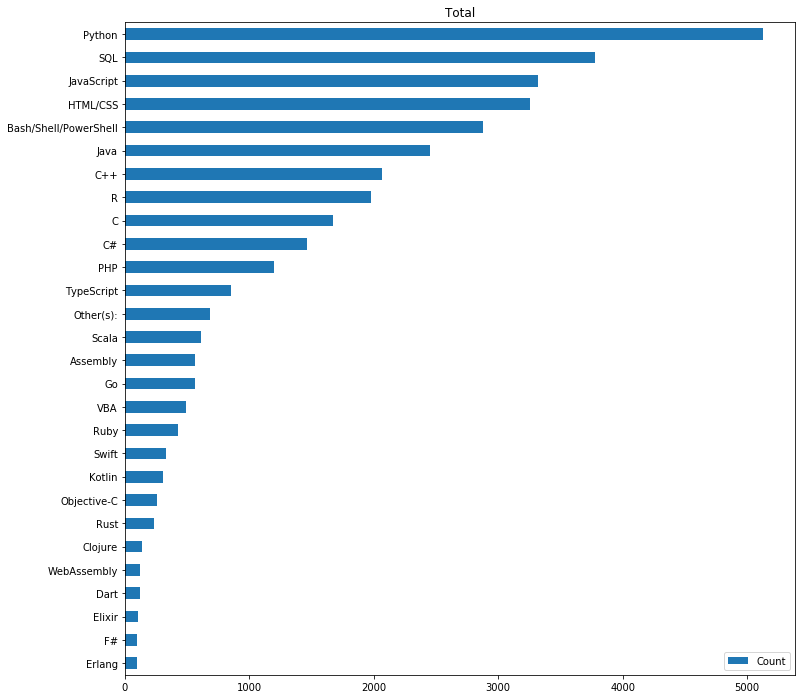

In [19]:
# Bien, maintenant nous avons un dataframe des langages par developpeur

# Visualization une distribution qui repondera à notre question
ds_count = pd.DataFrame(developer_language_count['Data scientist or machine learning specialist'])
ds_count.columns = ['Count']
ds_count.sort_values('Count',ascending=True,inplace=True)

ds_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = 'Total');

**Constat**

Python est de loin le langage de choix pour les développeurs qui s'identifient en tant que Data scientist ou spécialiste ML. Pour ceux qui souhaitent exceller par la suite dans la science des données ou dans l'apprentissage automatique, l'apprentissage du python est certainement un bon investissement.

---

# Quel est le salaire des developpeurs (le job le mieux payé, le pays qui paie bien)? 


---

In [20]:
salaries_df = df[['DevType', 'Country','ConvertedComp']]

for column in salaries_df.columns.tolist():
    col_desc = schema[schema['Column']==column]['QuestionText'].iloc[0]
    print(col_desc)

Which of the following describe you? Please select all that apply.
In which country do you currently reside?
Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.


In [21]:
# Vérfication des valeurs manquants
salaries_df.isnull().sum()

DevType           7548
Country            132
ConvertedComp    33060
dtype: int64

In [22]:
# Valeurs manquantes en %
round((salaries_df.isnull().sum()/salaries_df.shape[0])*100,1)

DevType           8.5
Country           0.1
ConvertedComp    37.2
dtype: float64

---
__Constat__

il semble qu'un grand nombre de développeurs ne révèlent pas leurs salaires, ce qui pourrait être dû à des problèmes de confidentialité.

---

Pour évaluer la rémunération des développeurs, nous utiliserons la répartition des salaires par pays. 

In [23]:
# Suppression des lignes ne contenant aucun salaire dans notre data frame
clean_salaries_df = salaries_df.dropna().reset_index()
clean_salaries_df.head()

,index,DevType,Country,ConvertedComp
0,2,"Designer;Developer, back-end;Developer, front-...",Thailand,8820.0
1,3,"Developer, full-stack",United States,61000.0
2,5,Data or business analyst;Data scientist or mac...,Canada,366420.0
3,8,"Database administrator;Developer, back-end;Dev...",New Zealand,95179.0
4,9,Data or business analyst;Data scientist or mac...,India,13293.0


In [24]:
clean_salaries_df.shape

(55081, 4)

In [25]:
# Nombre de developeurs par pays
clean_salaries_df.Country.value_counts().reset_index()

,index,Country
0,United States,14756
1,United Kingdom,3967
2,India,3953
3,Germany,3734
4,Canada,2225
...,...,...
155,Angola,1
156,Timor-Leste,1
157,Togo,1
158,Saint Vincent and the Grenadines,1


Wow, très intéressant!

Un grand nombre de pays sont sous-représentés, les États-Unis ont de loin le plus grand nombre de répondants.

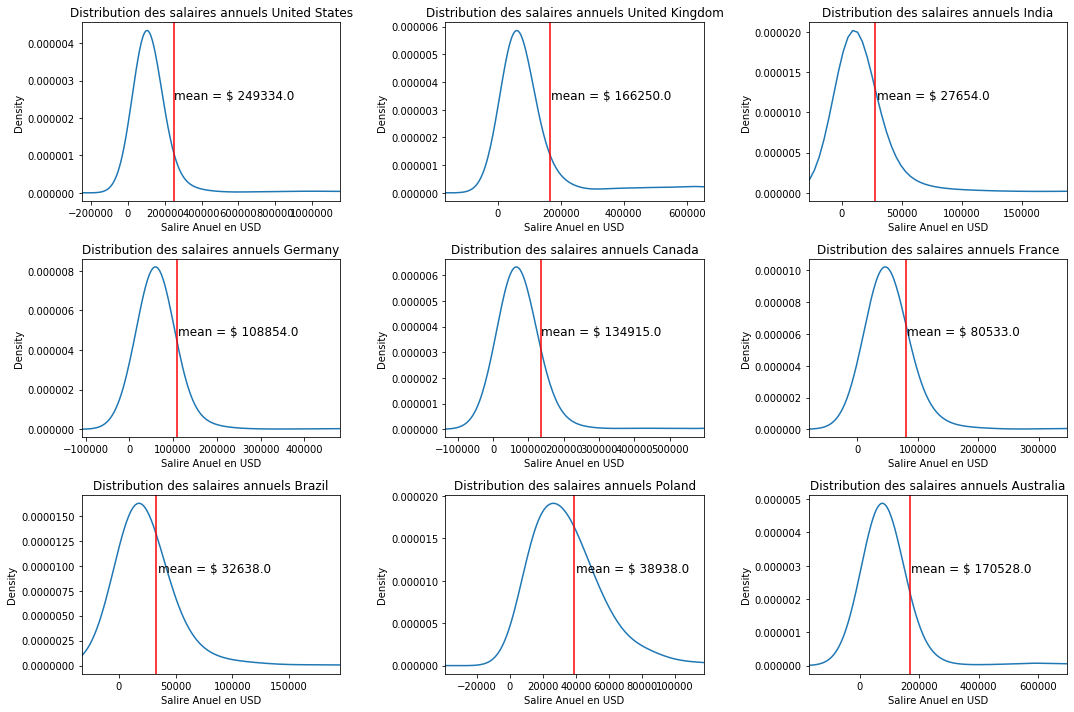

In [26]:
# repartition des 10 premiers pays en graphe

fig = plt.figure(figsize=(15,10))

countries = clean_salaries_df['Country'].value_counts().sort_values(ascending=False)[:9].index.tolist()

for i,country in enumerate(countries):
    plt.subplot(3,3,i+1)
    temp_salaries = clean_salaries_df.loc[clean_salaries_df['Country']==country,'ConvertedComp']

    ax = temp_salaries.plot(kind='kde')
    ax.axvline(temp_salaries.mean(), linestyle = '-', color = 'red')
    ax.text((temp_salaries.mean() + 1500), (float(ax.get_ylim()[1])*0.55), 'mean = $ ' + str(round(temp_salaries.mean(),0)), fontsize = 12)
    ax.set_xlabel('Salire Anuel en USD')
    ax.set_xlim(-temp_salaries.mean(),temp_salaries.mean()+2*temp_salaries.std())
    
    ax.set_title('Distribution des salaires annuels {}'.format(country))

plt.tight_layout()
plt.savefig('salaire_developeur_pays.png',bbox_inches = 'tight')
plt.show()

---

Les États-Unis ont de loin les salaires les plus élevés.

Bien que l'analyse soit utile, nous aimerions connaître les distributions pour les développeurs liés au Data Science.

---

In [27]:
# type de salaires de developpeurs
developer_salary_df = df[['DevType','Country','ConvertedComp']]
# suppression des lignes vides
clean_developer_salary_df = developer_salary_df.dropna()

In [28]:
developer_count = pd.DataFrame.from_dict(unique_developers, orient='index', dtype=None)
# liste des pays
developer_countries = list(clean_salaries_df['Country'].value_counts().index)

# Dictionnaire avec nom du pays comme clé et  initialisé avec 0 pour chaque valeur de clé de pays correspondante
developer_salary_dict = {key: 0 for key in developer_countries}

# pour chaque pays dans le dictionnaire, nous voulons mettre le type de développeur et initialiser dans une liste vide
for developer in developer_salary_dict.keys():
    developer_salary_dict[developer] = {key: [] for key in developer_count.index.tolist()}

# remplissage du dictionnaire des salaires de developpeurs avec salaires par type de développeur par pays
for key, val in enumerate(clean_developer_salary_df['DevType']):
    all_developers = val.split(';')
    country = clean_developer_salary_df.iloc[key, 1]
    salary = clean_developer_salary_df.iloc[key, 2]
    
    for developer in all_developers:
        developer_salary_dict[country][developer].append(salary)

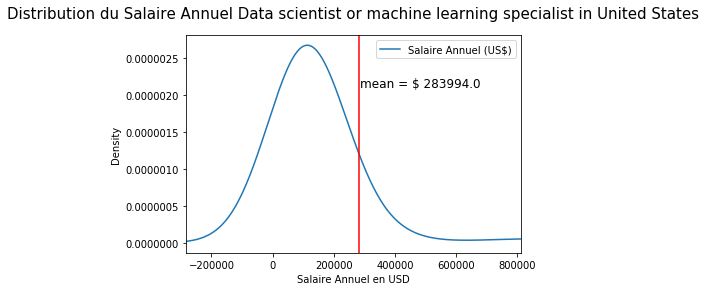

In [29]:
# Maintenant, visualisons les salaires des développeurs liés à la science des données aux États-Unis.
dev_type = 'Data scientist or machine learning specialist'

figsize = (15,10)
df1 = pd.DataFrame({'Salaire Annuel (US$)':developer_salary_dict['United States'][dev_type]})
ax = df1.plot(kind = 'kde')
mean = df1['Salaire Annuel (US$)'].mean()

ax.axvline(mean, linestyle = '-', color = 'red')
ax.text((mean + 1500), (float(ax.get_ylim()[1])*0.75), 'mean = $ ' + str(round(mean,0)), fontsize = 12)
ax.set_xlabel('Salaire Annuel en USD')
ax.set_xlim(-mean,mean+2*temp_salaries.std())
ax.set_title('Distribution du Salaire Annuel {} in {}'.format(dev_type, 'United States'), fontsize = 15, y = 1.05)
plt.savefig('salaries_pour_data_science_usa',bbox_inches = 'tight')
plt.show()

Les salaires moyens sont beaucoup plus élevés que la moyenne globale aux États-Unis.

---

# Quel est le framework le mieux choisi des developpeurs?

---

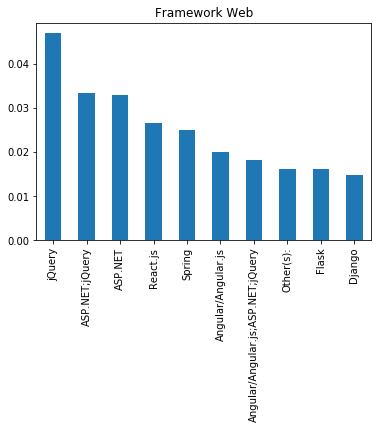

In [30]:
count_values = df.WebFrameWorkedWith.value_counts()# Pandas series pour le compteur de chaque LanguageWorkedWith

# 10 premiers framework

(count_values[:10]/df.shape[0]).plot(kind="bar");
plt.title("Framework Web");

In [31]:
#le format des frameworks web doit être nettoyé, pour les développeurs utilisant plusieurs frameworks,
# les frameworks sont concaténés avec;

In [32]:
# Nous divisons WebFrameWrokedWith pour une meilleure perception
frameworks = df[df['WebFrameWorkedWith'].notnull()]

unique_frameworks = {}

# On fait un split au ;
for framework_set in frameworks['WebFrameWorkedWith'].apply(lambda row: str(row).split(';')):
    for framework in framework_set:
        if framework not in unique_frameworks.keys():
            unique_frameworks[framework] = 1
        else:
            unique_frameworks[framework] += 1
    

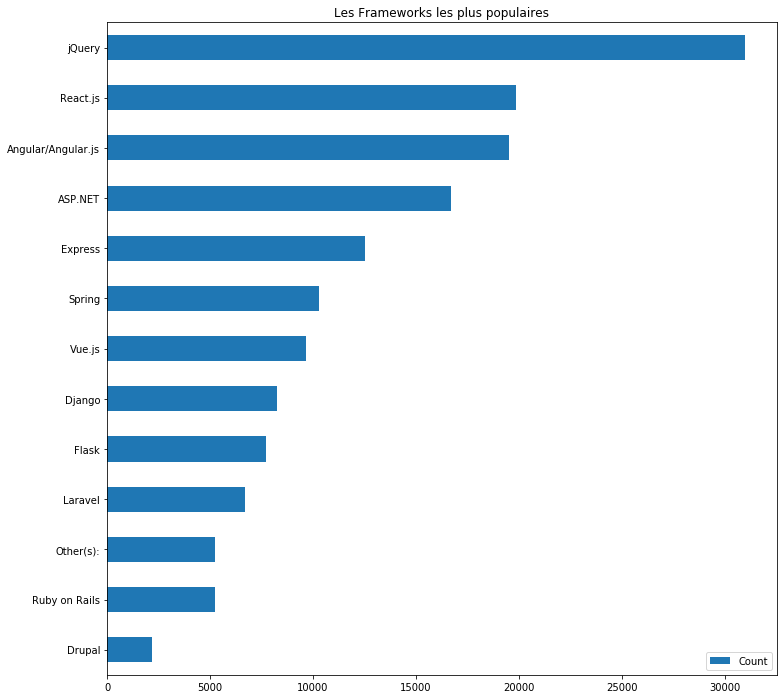

In [33]:
# Graphe à barre
framework_count = pd.DataFrame.from_dict(unique_frameworks, orient='index', dtype=None)
framework_count.columns = ['Count']
framework_count.sort_values('Count',ascending=True,inplace=True)

framework_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = 'Les Frameworks les plus populaires');

---

Bien qu'il soit satisfaisant de connaître les frameworks les plus populaires, cela ne permet pas à lui seul de connaître le framework le plus populaire pour la data science. Donc, nous allons prendre une approche légèrement différente.

---

In [34]:
# Nous divisons WebFrameWrokedWith pour une meilleure perception

# prennons les developpeurs uniques
developers = df[df['DevType'].notnull()] # suppression des champs nuls

unique_developers = {}

# On fait un split au ;
for developer_set in developers['DevType'].apply(lambda row: str(row).split(';')):
    for developer in developer_set:
        if developer not in unique_developers.keys():
            unique_developers[developer] = 1
        else:
            unique_developers[developer] += 1

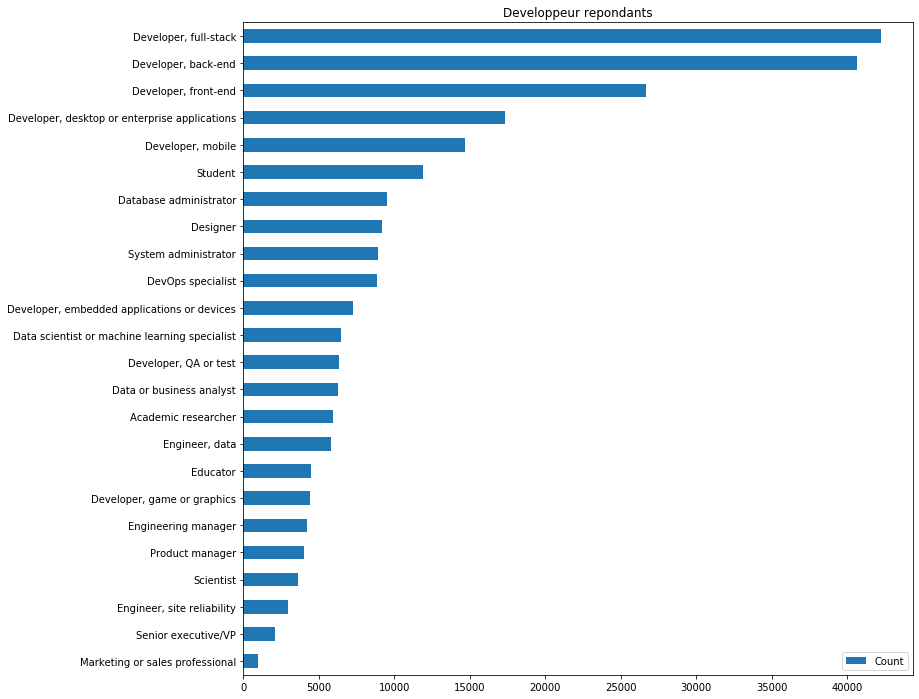

In [35]:
# un graphe à barre
developer_count = pd.DataFrame.from_dict(unique_developers, orient='index', dtype=None)
developer_count.columns = ['Count']
developer_count.sort_values('Count',ascending=True,inplace=True)

developer_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = 'Developpeur repondants');

Puisque nous sommes intéressés par le frameowrk de choix des Data Scientist, nous nous concentrerons sur 'Data scientist or machine learning specialist'

In [36]:
# Pour chaque 'Data scientist or machine learning specialist' developpeur, comptons les frameworks
frameworks = frameworks[frameworks['DevType'].notnull()]

# dictionnaire vide de developpeurs
developer_dict = {}
for devtype in developer_count.index.tolist():
    developer_dict['{}'.format(devtype)] = {}

# remplissage du dictionnaire avec les frameworks
for dev in developer_dict.keys():
    developer_dict[dev] = {key: 0 for key in list(unique_frameworks.keys())}
    
# Maintenant, nous comptons les nombres de developpeurs utilisant le framework
for key, val in enumerate(frameworks['DevType']):
    all_developers = val.split(';')
    all_frameworks = frameworks.iloc[key, 49].split(';')
    for dev in all_developers:
        for fra in all_frameworks:
            developer_dict[dev][fra] += 1

developer_framework_count = pd.DataFrame.from_dict(developer_dict, orient='index', dtype=None).T

In [37]:
developer_framework_count.head()

,Marketing or sales professional,Senior executive/VP,"Engineer, site reliability",Scientist,Product manager,Engineering manager,"Developer, game or graphics",Educator,"Engineer, data",Academic researcher,...,DevOps specialist,System administrator,Designer,Database administrator,Student,"Developer, mobile","Developer, desktop or enterprise applications","Developer, front-end","Developer, back-end","Developer, full-stack"
Django,127,281,471,471,489,496,431,581,867,765,...,1254,1238,858,1109,1545,1223,1247,2420,4455,4573
Flask,101,256,518,500,423,484,358,505,1075,750,...,1360,1144,640,947,1294,925,1185,1856,4113,3892
Express,169,431,537,338,730,787,708,740,765,668,...,1705,1374,1491,1514,1808,2600,2109,5890,6237,9031
jQuery,478,875,996,930,1768,1456,1689,1818,1871,1861,...,3216,4003,4686,4892,4274,5460,6969,13662,16358,20583
React.js,227,659,786,528,1092,1222,1008,1077,1139,918,...,2469,1828,2299,1963,2314,3774,3178,9608,9357,13942


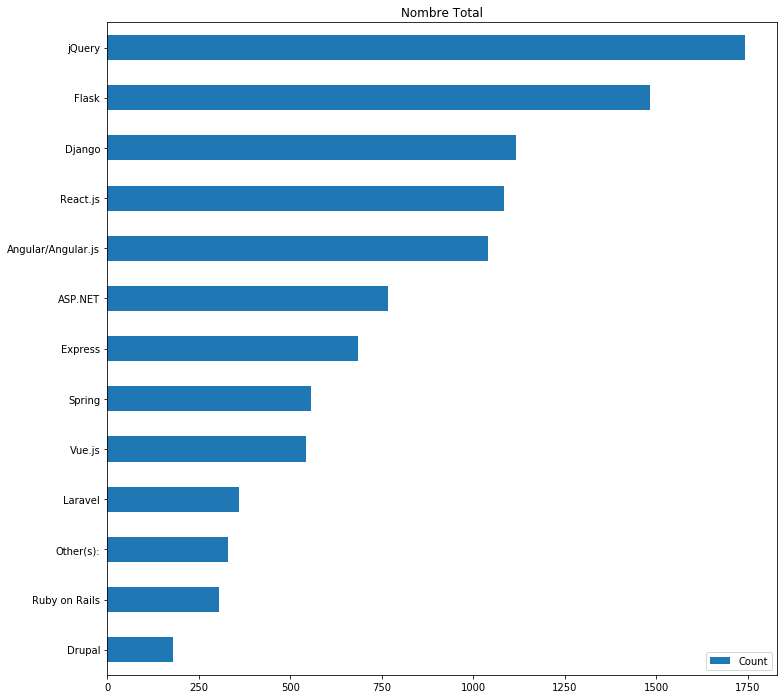

In [38]:
# Bien, maintenant nous avons un dataframe de framework par developpeur

# Répondons maitenant à notre question
ds_count = pd.DataFrame(developer_framework_count['Data scientist or machine learning specialist'])
ds_count.columns = ['Count']
ds_count.sort_values('Count',ascending=True,inplace=True)

ds_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = 'Nombre Total');

---
__Constat__

Très intéressant, JQuery, Flask et Django sont les trois premiers frameworks de choix pour un Data scientist ou un spécialiste ML. Pour ceux qui souhaitent entrer dans le monde de la science des données ou de l'apprentissage automatique, l'apprentissage de ces frameworks est certainement un bon investissement. Mais globalement, jQuery est le framework de choix pour 17% de tous les développeurs qui s'identifient en tant que Data scientist ou spécialiste ML.

Flask n'est pas loin non plus.

---